In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/Users/ariadnapuigventos/Documents/CURSOS/BRIDGE/DS_Ejercicios_Python/BootCamp_TheBridge/Proyecto_Navidad_Ariadna/documentation/world_marathon_majors.csv", sep= ";")
df

,year,winner,gender,country,time,marathon
0,2014,Dennis Kimetto,Male,Kenya,02:02:57,Berlin
1,2011,Geoffrey Mutai,Male,Kenya,02:03:02,Boston
2,2016,Kenenisa Bekele,Male,Ethiopia,02:03:03,Berlin
3,2016,Eliud Kipchoge,Male,Kenya,02:03:05,London
4,2013,Wilson Kipsang,Male,Kenya,02:03:23,Berlin
...,...,...,...,...,...,...
531,1966,Bobbi Gibb,Female,United States,03:21:40,Boston
532,1974,Jutta von Haase,Female,Germany,03:22:01,Berlin
533,1969,Sara Mae Berman,Female,United States,03:22:46,Boston
534,1967,Bobbi Gibb,Female,United States,03:27:17,Boston


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      536 non-null    int64 
 1   winner    536 non-null    object
 2   gender    536 non-null    object
 3   country   536 non-null    object
 4   time      536 non-null    object
 5   marathon  536 non-null    object
dtypes: int64(1), object(5)
memory usage: 25.2+ KB


In [18]:
#Use enconde gender column

df['gender_1'] = df['gender'].apply(lambda x: 0 if x == "Male" else 1)
df['gender_1']

0      0
1      0
2      0
3      0
4      0
      ..
531    1
532    1
533    1
534    1
535    1
Name: gender_1, Length: 536, dtype: category
Categories (2, int64): [1, 0]

In [19]:
#to confirm that gender_1 is int64
df['gender_1'] = df['gender_1'].astype("int64")

In [20]:
# to confirm types of the dataframe!!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   year              536 non-null    int64   
 1   winner            536 non-null    object  
 2   gender            536 non-null    category
 3   country           536 non-null    object  
 4   time              536 non-null    float64 
 5   marathon          536 non-null    object  
 6   gender_1          536 non-null    int64   
 7   encoded_country   536 non-null    int64   
 8   encoded_marathon  536 non-null    int64   
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 34.2+ KB


In [21]:
df.time = pd.to_timedelta(df["time"].str.strip())
df.time = df.time.astype('timedelta64[s]')
df.time

AttributeError: Can only use .str accessor with string values!

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
df["encoded_country"] = le.fit_transform(df["country"])
df

,year,winner,gender,country,time,marathon,gender_1,encoded_country
0,2014,Dennis Kimetto,Male,Kenya,7377.0,Berlin,0,17
1,2011,Geoffrey Mutai,Male,Kenya,7382.0,Boston,0,17
2,2016,Kenenisa Bekele,Male,Ethiopia,7383.0,Berlin,0,8
3,2016,Eliud Kipchoge,Male,Kenya,7385.0,London,0,17
4,2013,Wilson Kipsang,Male,Kenya,7403.0,Berlin,0,17
...,...,...,...,...,...,...,...,...
531,1966,Bobbi Gibb,Female,United States,12100.0,Boston,1,35
532,1974,Jutta von Haase,Female,Germany,12121.0,Berlin,1,10
533,1969,Sara Mae Berman,Female,United States,12166.0,Boston,1,35
534,1967,Bobbi Gibb,Female,United States,12437.0,Boston,1,35


In [22]:
encode = LabelEncoder()
df["encoded_marathon"] = encode.fit_transform(df["marathon"])
df

,year,winner,gender,country,time,marathon,gender_1,encoded_country,encoded_marathon
0,2014,Dennis Kimetto,Male,Kenya,7377.0,Berlin,0,17,0
1,2011,Geoffrey Mutai,Male,Kenya,7382.0,Boston,0,17,1
2,2016,Kenenisa Bekele,Male,Ethiopia,7383.0,Berlin,0,8,0
3,2016,Eliud Kipchoge,Male,Kenya,7385.0,London,0,17,3
4,2013,Wilson Kipsang,Male,Kenya,7403.0,Berlin,0,17,0
...,...,...,...,...,...,...,...,...,...
531,1966,Bobbi Gibb,Female,United States,12100.0,Boston,1,35,1
532,1974,Jutta von Haase,Female,Germany,12121.0,Berlin,1,10,0
533,1969,Sara Mae Berman,Female,United States,12166.0,Boston,1,35,1
534,1967,Bobbi Gibb,Female,United States,12437.0,Boston,1,35,1


                      year      time  gender_1  encoded_country  \
year              1.000000 -0.427552  0.283231        -0.265384   
time             -0.427552  1.000000  0.543997         0.204407   
gender_1          0.283231  0.543997  1.000000        -0.024941   
encoded_country  -0.265384  0.204407 -0.024941         1.000000   
encoded_marathon  0.276483 -0.148728  0.075415         0.098366   

                  encoded_marathon  
year                      0.276483  
time                     -0.148728  
gender_1                  0.075415  
encoded_country           0.098366  
encoded_marathon          1.000000  


,year,time,gender_1,encoded_country,encoded_marathon
year,1.000000,-0.427552,0.283231,-0.265384,0.276483
time,-0.427552,1.000000,0.543997,0.204407,-0.148728
gender_1,0.283231,0.543997,1.000000,-0.024941,0.075415
encoded_country,-0.265384,0.204407,-0.024941,1.000000,0.098366
encoded_marathon,0.276483,-0.148728,0.075415,0.098366,1.000000


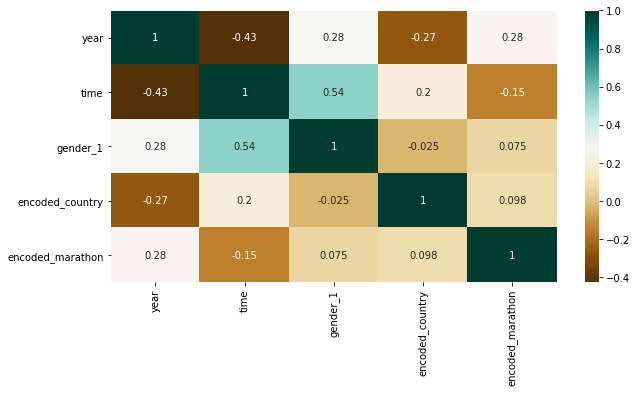

In [16]:
plt.figure(figsize=(10,5))
matriz = df.corr()
print(matriz)
sns.heatmap(matriz, cmap="BrBG",annot=True)
matriz

In [23]:
s_df = pd.DataFrame(df[63:536])
s_df

,year,winner,gender,country,time,marathon,gender_1,encoded_country,encoded_marathon
63,2005,Martin Lel,Male,Kenya,7655.0,London,0,17,3
64,2006,Robert Cheruiyot,Male,Kenya,7655.0,Chicago,0,17,2
65,2011,Hailu Mekonnen,Male,Ethiopia,7655.0,Tokyo,0,8,5
66,2012,Michael Kipyego,Male,Kenya,7657.0,Tokyo,0,17,5
67,1997,Elijah Lagat,Male,Kenya,7661.0,Berlin,0,17,0
...,...,...,...,...,...,...,...,...,...
531,1966,Bobbi Gibb,Female,United States,12100.0,Boston,1,35,1
532,1974,Jutta von Haase,Female,Germany,12121.0,Berlin,1,10,0
533,1969,Sara Mae Berman,Female,United States,12166.0,Boston,1,35,1
534,1967,Bobbi Gibb,Female,United States,12437.0,Boston,1,35,1


                      year      time  gender_1  encoded_country  \
year              1.000000 -0.357453  0.411414        -0.244556   
time             -0.357453  1.000000  0.478210         0.177196   
gender_1          0.411414  0.478210  1.000000        -0.066134   
encoded_country  -0.244556  0.177196 -0.066134         1.000000   
encoded_marathon  0.299996 -0.177691  0.085737         0.092922   

                  encoded_marathon  
year                      0.299996  
time                     -0.177691  
gender_1                  0.085737  
encoded_country           0.092922  
encoded_marathon          1.000000  


,year,time,gender_1,encoded_country,encoded_marathon
year,1.000000,-0.357453,0.411414,-0.244556,0.299996
time,-0.357453,1.000000,0.478210,0.177196,-0.177691
gender_1,0.411414,0.478210,1.000000,-0.066134,0.085737
encoded_country,-0.244556,0.177196,-0.066134,1.000000,0.092922
encoded_marathon,0.299996,-0.177691,0.085737,0.092922,1.000000


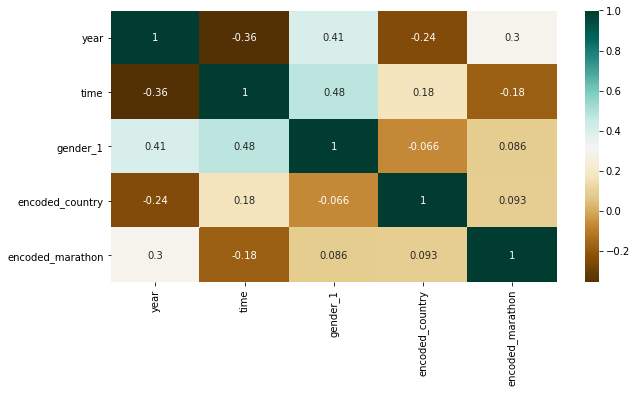

In [24]:
plt.figure(figsize=(10,5))
matriz = s_df.corr()
print(matriz)
sns.heatmap(matriz, cmap="BrBG",annot=True)
matriz